In [2]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
plt.rcParams['image.cmap'] = 'gray'

In [3]:
import torch
use_cuda=torch.cuda.is_available()

import keras
from torchsummary import summary
import os
import datasets
import pytorch_models,pytorch_experiment
import torch.optim as optim
dataset="cifar10"
(x_train, y_train), (x_test, y_test), input_shape,num_classes = datasets.get_data(dataset)


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


Using TensorFlow backend.
/home/facundo/.python/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
conv_filters={"mnist":32,"cifar10":64}
fc_filters={"mnist":64,"cifar10":128}

#conv_filters={"mnist":4,"cifar10":16}
#fc_filters={"mnist":32,"cifar10":128}

model = pytorch_models.SimpleSTN(input_shape,num_classes, conv_filters=conv_filters[dataset],
                                 fc_filters=fc_filters[dataset],only_rotation=False)

if use_cuda:
    model=model.cuda()
    
parameters=pytorch_experiment.add_weight_decay(model.net.named_parameters(),1e-10)
parameters += [{'params':model.stl.parameters(),'lr':0.001}]

optimizer = optim.Adam(parameters, lr=0.01)

print(model)
#summary(model, input_size=[1,28,28])


SimpleSTN(
  (stl): LearnableAffineTransformation(
    (locnet): Sequential(
      (0): Conv2d(3, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
      (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (2): ReLU()
      (3): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): ReLU()
      (6): Flatten()
      (7): Linear(in_features=1024, out_features=32, bias=True)
    )
    (fc_loc): Linear(in_features=32, out_features=6, bias=True)
  )
  (net): SimpleConv(
    (conv): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     

In [5]:
rotated_model = pytorch_models.SimpleSTN(input_shape,num_classes, conv_filters=conv_filters[dataset],
                                         fc_filters=fc_filters[dataset],only_rotation=False)


from torch.optim.lr_scheduler import LambdaLR 

if use_cuda:
    rotated_model= rotated_model.cuda()

# lambda1 = lambda epoch: 0.00001 if epoch<10 else 0.001
# lambda2 = lambda epoch: 0.001

# scheduler = LambdaLR(optimizer, lr_lambda=[lambda2,lambda2, lambda1])

rotated_parameters=pytorch_experiment.add_weight_decay(rotated_model.net.named_parameters(),1e-9)
rotated_parameters += [{'params':rotated_model.stl.parameters(),'lr':0.001}]

rotated_optimizer = optim.Adam(rotated_parameters, lr=0.01)


print(rotated_model)
#summary(model, input_size=[1,28,28])


SimpleSTN(
  (stl): LearnableAffineTransformation(
    (locnet): Sequential(
      (0): Conv2d(3, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
      (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (2): ReLU()
      (3): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): ReLU()
      (6): Flatten()
      (7): Linear(in_features=1024, out_features=32, bias=True)
    )
    (fc_loc): Linear(in_features=32, out_features=6, bias=True)
  )
  (net): SimpleConv(
    (conv): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     

Training model with unrotated dataset...


Epoch 1: 100% (batch 782/782)  ==stats==> loss:   1.86, accuracy:  0.422, Time:  0:00:31


Test => Loss: 1.6801, Accuracy: 50.21% (5021/10000)


Epoch 2: 100% (batch 782/782)  ==stats==> loss:    1.3, accuracy:  0.537, Time:  0:00:31


Test => Loss: 1.2154, Accuracy: 56.57% (5657/10000)


Epoch 3: 100% (batch 782/782)  ==stats==> loss:   1.16, accuracy:  0.592, Time:  0:00:30


Test => Loss: 1.1514, Accuracy: 58.46% (5846/10000)


Epoch 4: 100% (batch 782/782)  ==stats==> loss:   1.06, accuracy:  0.626, Time:  0:00:32


Test => Loss: 1.0620, Accuracy: 62.31% (6231/10000)


Epoch 5: 100% (batch 782/782)  ==stats==> loss:  0.993, accuracy:  0.653, Time:  0:00:31


Test => Loss: 1.0063, Accuracy: 64.37% (6437/10000)


Epoch 6: 100% (batch 782/782)  ==stats==> loss:  0.937, accuracy:  0.675, Time:  0:00:31


Test => Loss: 0.9877, Accuracy: 65.59% (6559/10000)


Epoch 7: 100% (batch 782/782)  ==stats==> loss:  0.892, accuracy:  0.691, Time:  0:00:31


Test => Loss: 0.9518, Accuracy: 66.51% (6651/10000)


Epoch 8: 100% (batch 782/782)  ==stats==> loss:   0.85, accuracy:  0.705, Time:  0:00:31


Test => Loss: 0.9175, Accuracy: 68.14% (6814/10000)


Epoch 9: 100% (batch 782/782)  ==stats==> loss:  0.815, accuracy:  0.717, Time:  0:00:31


Test => Loss: 0.9022, Accuracy: 68.47% (6847/10000)


Epoch 10: 100% (batch 782/782)  ==stats==> loss:  0.778, accuracy:  0.733, Time:  0:00:31


Test => Loss: 0.9201, Accuracy: 67.49% (6749/10000)


Epoch 11: 100% (batch 782/782)  ==stats==> loss:  0.749, accuracy:  0.743, Time:  0:00:31


Test => Loss: 0.8860, Accuracy: 69.16% (6916/10000)


Epoch 12: 100% (batch 782/782)  ==stats==> loss:  0.721, accuracy:  0.752, Time:  0:00:30


Test => Loss: 0.8934, Accuracy: 69.03% (6903/10000)


Epoch 13: 100% (batch 782/782)  ==stats==> loss:  0.693, accuracy:  0.763, Time:  0:00:31


Test => Loss: 0.8618, Accuracy: 70.20% (7020/10000)


Epoch 14: 100% (batch 782/782)  ==stats==> loss:  0.664, accuracy:  0.775, Time:  0:00:30


Test => Loss: 0.8234, Accuracy: 71.74% (7174/10000)


Epoch 15: 100% (batch 782/782)  ==stats==> loss:  0.635, accuracy:  0.784, Time:  0:00:31


Test => Loss: 0.8278, Accuracy: 71.31% (7131/10000)


Epoch 16: 100% (batch 782/782)  ==stats==> loss:  0.609, accuracy:  0.795, Time:  0:00:31


Test => Loss: 0.8140, Accuracy: 71.67% (7167/10000)


Epoch 17: 100% (batch 782/782)  ==stats==> loss:  0.583, accuracy:  0.803, Time:  0:00:31


Test => Loss: 0.8107, Accuracy: 72.16% (7216/10000)


Epoch 18: 100% (batch 782/782)  ==stats==> loss:  0.559, accuracy:  0.814, Time:  0:00:31


Test => Loss: 0.8056, Accuracy: 72.46% (7246/10000)


Epoch 19: 100% (batch 782/782)  ==stats==> loss:  0.531, accuracy:  0.822, Time:  0:00:32


Test => Loss: 0.7969, Accuracy: 72.94% (7294/10000)


Epoch 20: 100% (batch 782/782)  ==stats==> loss:   0.51, accuracy:  0.829, Time:  0:00:31


Test => Loss: 0.8082, Accuracy: 72.89% (7289/10000)


Epoch 21: 100% (batch 782/782)  ==stats==> loss:  0.483, accuracy:  0.841, Time:  0:00:31


Test => Loss: 0.7898, Accuracy: 72.95% (7295/10000)


Epoch 22: 100% (batch 782/782)  ==stats==> loss:  0.465, accuracy:  0.846, Time:  0:00:32


Test => Loss: 0.8025, Accuracy: 72.77% (7277/10000)


Epoch 23: 100% (batch 782/782)  ==stats==> loss:  0.439, accuracy:  0.855, Time:  0:00:31


Test => Loss: 0.8059, Accuracy: 72.98% (7298/10000)


Epoch 24: 100% (batch 782/782)  ==stats==> loss:  0.421, accuracy:  0.862, Time:  0:00:31


Test => Loss: 0.7953, Accuracy: 73.57% (7357/10000)


Epoch 25: 100% (batch 782/782)  ==stats==> loss:  0.396, accuracy:  0.871, Time:  0:00:31


Test => Loss: 0.7975, Accuracy: 73.55% (7355/10000)


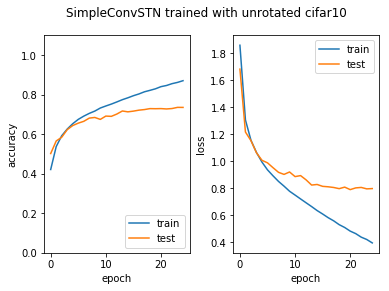

Skipping pretraining rotated model with unrotated dataset
Training rotated model with rotated dataset...


Epoch 1: 100% (batch 782/782)  ==stats==> loss:   1.88, accuracy:  0.309, Time:  0:00:32


Test => Loss: 2.4374, Accuracy: 20.89% (2089/10000)


Epoch 2: 100% (batch 782/782)  ==stats==> loss:   1.77, accuracy:  0.362, Time:  0:00:31


Test => Loss: 1.6735, Accuracy: 39.67% (3967/10000)


Epoch 3: 100% (batch 782/782)  ==stats==> loss:   1.65, accuracy:  0.404, Time:  0:00:32


Test => Loss: 1.5629, Accuracy: 43.19% (4319/10000)


Epoch 4: 100% (batch 782/782)  ==stats==> loss:   1.55, accuracy:  0.438, Time:  0:00:32


Test => Loss: 1.5746, Accuracy: 43.13% (4313/10000)


Epoch 5: 100% (batch 782/782)  ==stats==> loss:   1.47, accuracy:  0.469, Time:  0:00:31


Test => Loss: 1.4082, Accuracy: 48.80% (4880/10000)


Epoch 6: 100% (batch 782/782)  ==stats==> loss:   1.38, accuracy:  0.501, Time:  0:00:31


Test => Loss: 1.3530, Accuracy: 51.85% (5185/10000)


Epoch 7: 100% (batch 782/782)  ==stats==> loss:   1.31, accuracy:  0.527, Time:  0:00:32


Test => Loss: 1.2795, Accuracy: 54.16% (5416/10000)


Epoch 8: 100% (batch 782/782)  ==stats==> loss:   1.25, accuracy:  0.553, Time:  0:00:32


Test => Loss: 1.2399, Accuracy: 55.77% (5577/10000)


Epoch 9: 100% (batch 782/782)  ==stats==> loss:   1.19, accuracy:  0.572, Time:  0:00:30


Test => Loss: 1.2449, Accuracy: 55.60% (5560/10000)


Epoch 10: 100% (batch 782/782)  ==stats==> loss:   1.15, accuracy:  0.588, Time:  0:00:31


Test => Loss: 1.1682, Accuracy: 58.56% (5856/10000)


Epoch 11: 100% (batch 782/782)  ==stats==> loss:   1.11, accuracy:  0.603, Time:  0:00:30


Test => Loss: 1.1573, Accuracy: 58.56% (5856/10000)


Epoch 12: 100% (batch 782/782)  ==stats==> loss:   1.08, accuracy:  0.614, Time:  0:00:31


Test => Loss: 1.0942, Accuracy: 61.44% (6144/10000)


Epoch 13: 100% (batch 782/782)  ==stats==> loss:   1.06, accuracy:  0.625, Time:  0:00:32


Test => Loss: 1.0766, Accuracy: 61.72% (6172/10000)


Epoch 14: 100% (batch 782/782)  ==stats==> loss:   1.03, accuracy:  0.633, Time:  0:00:31


Test => Loss: 1.0441, Accuracy: 62.81% (6281/10000)


Epoch 15: 100% (batch 782/782)  ==stats==> loss:   1.01, accuracy:  0.642, Time:  0:00:31


Test => Loss: 1.0647, Accuracy: 62.83% (6283/10000)


Epoch 16: 100% (batch 782/782)  ==stats==> loss:  0.986, accuracy:  0.652, Time:  0:00:31


Test => Loss: 1.0156, Accuracy: 64.72% (6472/10000)


Epoch 17: 100% (batch 782/782)  ==stats==> loss:  0.976, accuracy:  0.653, Time:  0:00:32


Test => Loss: 1.0062, Accuracy: 64.70% (6470/10000)


Epoch 18: 100% (batch 782/782)  ==stats==> loss:  0.954, accuracy:  0.661, Time:  0:00:31


Test => Loss: 1.0453, Accuracy: 64.24% (6424/10000)


Epoch 19: 100% (batch 782/782)  ==stats==> loss:  0.936, accuracy:  0.667, Time:  0:00:31


Test => Loss: 0.9697, Accuracy: 66.12% (6612/10000)


Epoch 20: 100% (batch 782/782)  ==stats==> loss:   0.93, accuracy:  0.671, Time:  0:00:31


Test => Loss: 1.0046, Accuracy: 64.99% (6499/10000)


Epoch 21: 100% (batch 782/782)  ==stats==> loss:  0.913, accuracy:  0.679, Time:  0:00:31


Test => Loss: 0.9814, Accuracy: 65.96% (6596/10000)


Epoch 22: 100% (batch 782/782)  ==stats==> loss:  0.898, accuracy:  0.684, Time:  0:00:31


Test => Loss: 0.9621, Accuracy: 66.91% (6691/10000)


Epoch 23: 100% (batch 782/782)  ==stats==> loss:  0.888, accuracy:  0.686, Time:  0:00:31


Test => Loss: 0.9437, Accuracy: 67.57% (6757/10000)


Epoch 24: 100% (batch 782/782)  ==stats==> loss:   0.88, accuracy:  0.691, Time:  0:00:31


Test => Loss: 0.9959, Accuracy: 65.82% (6582/10000)


Epoch 25: 100% (batch 782/782)  ==stats==> loss:   0.87, accuracy:  0.695, Time:  0:00:31


Test => Loss: 0.9719, Accuracy: 66.43% (6643/10000)


Epoch 26: 100% (batch 782/782)  ==stats==> loss:  0.858, accuracy:  0.699, Time:  0:00:32


Test => Loss: 0.9371, Accuracy: 67.51% (6751/10000)


Epoch 27: 100% (batch 782/782)  ==stats==> loss:  0.849, accuracy:  0.701, Time:  0:00:32


Test => Loss: 0.9485, Accuracy: 66.92% (6692/10000)


Epoch 28: 100% (batch 782/782)  ==stats==> loss:  0.839, accuracy:  0.706, Time:  0:00:32


Test => Loss: 0.9325, Accuracy: 67.85% (6785/10000)


Epoch 29: 100% (batch 782/782)  ==stats==> loss:  0.832, accuracy:  0.709, Time:  0:00:31


Test => Loss: 0.9459, Accuracy: 67.99% (6799/10000)


Epoch 30: 100% (batch 782/782)  ==stats==> loss:  0.825, accuracy:  0.711, Time:  0:00:32


Test => Loss: 0.9142, Accuracy: 68.53% (6853/10000)


Epoch 31: 100% (batch 782/782)  ==stats==> loss:  0.818, accuracy:  0.713, Time:  0:00:31


Test => Loss: 0.9358, Accuracy: 68.37% (6837/10000)


Epoch 32: 100% (batch 782/782)  ==stats==> loss:  0.807, accuracy:  0.717, Time:  0:00:30


Test => Loss: 0.9277, Accuracy: 68.38% (6838/10000)


Epoch 33: 100% (batch 782/782)  ==stats==> loss:  0.801, accuracy:  0.721, Time:  0:00:32


Test => Loss: 0.9515, Accuracy: 67.45% (6745/10000)


Epoch 34: 100% (batch 782/782)  ==stats==> loss:  0.799, accuracy:   0.72, Time:  0:00:31


Test => Loss: 0.9179, Accuracy: 68.46% (6846/10000)


Epoch 35: 100% (batch 782/782)  ==stats==> loss:  0.792, accuracy:  0.723, Time:  0:00:31


Test => Loss: 0.8941, Accuracy: 69.18% (6918/10000)


Epoch 36: 100% (batch 782/782)  ==stats==> loss:  0.791, accuracy:  0.723, Time:  0:00:31


Test => Loss: 0.8884, Accuracy: 69.67% (6967/10000)


Epoch 37: 100% (batch 782/782)  ==stats==> loss:  0.783, accuracy:  0.725, Time:  0:00:32


Test => Loss: 0.9319, Accuracy: 68.05% (6805/10000)


Epoch 38: 100% (batch 782/782)  ==stats==> loss:  0.776, accuracy:  0.729, Time:  0:00:32


Test => Loss: 0.8704, Accuracy: 70.08% (7008/10000)


Epoch 39: 100% (batch 782/782)  ==stats==> loss:   0.77, accuracy:  0.729, Time:  0:00:31


Test => Loss: 0.8937, Accuracy: 69.37% (6937/10000)


Epoch 40: 100% (batch 782/782)  ==stats==> loss:  0.764, accuracy:  0.733, Time:  0:00:32


Test => Loss: 0.9046, Accuracy: 68.91% (6891/10000)


Epoch 41: 100% (batch 782/782)  ==stats==> loss:   0.76, accuracy:  0.734, Time:  0:00:31


Test => Loss: 0.9017, Accuracy: 69.73% (6973/10000)


Epoch 42: 100% (batch 782/782)  ==stats==> loss:  0.755, accuracy:  0.736, Time:  0:00:31


Test => Loss: 0.9097, Accuracy: 69.34% (6934/10000)


Epoch 43: 100% (batch 782/782)  ==stats==> loss:  0.752, accuracy:  0.737, Time:  0:00:32


Test => Loss: 0.8923, Accuracy: 68.92% (6892/10000)


Epoch 44: 100% (batch 782/782)  ==stats==> loss:  0.749, accuracy:  0.737, Time:  0:00:31


Test => Loss: 0.9115, Accuracy: 69.36% (6936/10000)


Epoch 45: 100% (batch 782/782)  ==stats==> loss:  0.742, accuracy:   0.74, Time:  0:00:31


Test => Loss: 0.8672, Accuracy: 69.91% (6991/10000)


Epoch 46: 100% (batch 782/782)  ==stats==> loss:  0.738, accuracy:  0.741, Time:  0:00:32


Test => Loss: 0.8876, Accuracy: 69.46% (6946/10000)


Epoch 47: 100% (batch 782/782)  ==stats==> loss:  0.735, accuracy:  0.742, Time:  0:00:32


Test => Loss: 0.8843, Accuracy: 69.76% (6976/10000)


Epoch 48: 100% (batch 782/782)  ==stats==> loss:  0.728, accuracy:  0.743, Time:  0:00:30


Test => Loss: 0.8785, Accuracy: 70.42% (7042/10000)


Epoch 49: 100% (batch 782/782)  ==stats==> loss:  0.728, accuracy:  0.746, Time:  0:00:32


Test => Loss: 0.8851, Accuracy: 70.21% (7021/10000)


Epoch 50: 100% (batch 782/782)  ==stats==> loss:  0.723, accuracy:  0.748, Time:  0:00:32


Test => Loss: 0.8774, Accuracy: 70.02% (7002/10000)


Epoch 51: 100% (batch 782/782)  ==stats==> loss:  0.719, accuracy:  0.748, Time:  0:00:31


Test => Loss: 0.8725, Accuracy: 70.36% (7036/10000)


Epoch 52: 100% (batch 782/782)  ==stats==> loss:  0.712, accuracy:  0.751, Time:  0:00:31


Test => Loss: 0.8825, Accuracy: 70.15% (7015/10000)


Epoch 53: 100% (batch 782/782)  ==stats==> loss:  0.713, accuracy:  0.749, Time:  0:00:33


Test => Loss: 0.8748, Accuracy: 70.27% (7027/10000)


Epoch 54: 100% (batch 782/782)  ==stats==> loss:   0.71, accuracy:  0.752, Time:  0:00:34


Test => Loss: 0.8874, Accuracy: 70.12% (7012/10000)


Epoch 55: 100% (batch 782/782)  ==stats==> loss:  0.701, accuracy:  0.755, Time:  0:00:31


Test => Loss: 0.8676, Accuracy: 70.85% (7085/10000)


Epoch 56: 100% (batch 782/782)  ==stats==> loss:    0.7, accuracy:  0.758, Time:  0:00:31


Test => Loss: 0.8704, Accuracy: 70.50% (7050/10000)


Epoch 57: 100% (batch 782/782)  ==stats==> loss:  0.698, accuracy:  0.757, Time:  0:00:31


Test => Loss: 0.9044, Accuracy: 69.73% (6973/10000)


Epoch 58: 100% (batch 782/782)  ==stats==> loss:  0.699, accuracy:  0.756, Time:  0:00:31


Test => Loss: 0.8985, Accuracy: 69.81% (6981/10000)


Epoch 59: 100% (batch 782/782)  ==stats==> loss:  0.693, accuracy:  0.759, Time:  0:00:32


Test => Loss: 0.8711, Accuracy: 70.56% (7056/10000)


Epoch 60: 100% (batch 782/782)  ==stats==> loss:   0.69, accuracy:  0.758, Time:  0:00:32


Test => Loss: 0.8550, Accuracy: 71.25% (7125/10000)


Epoch 61: 100% (batch 782/782)  ==stats==> loss:  0.684, accuracy:  0.759, Time:  0:00:32


Test => Loss: 0.8614, Accuracy: 71.41% (7141/10000)


Epoch 62: 100% (batch 782/782)  ==stats==> loss:  0.677, accuracy:  0.764, Time:  0:00:31


Test => Loss: 0.8803, Accuracy: 70.70% (7070/10000)


Epoch 63: 100% (batch 782/782)  ==stats==> loss:  0.678, accuracy:  0.763, Time:  0:00:32


Test => Loss: 0.8758, Accuracy: 70.82% (7082/10000)


Epoch 64: 100% (batch 782/782)  ==stats==> loss:  0.675, accuracy:  0.764, Time:  0:00:31


Test => Loss: 0.8841, Accuracy: 70.82% (7082/10000)


Epoch 65: 100% (batch 782/782)  ==stats==> loss:  0.676, accuracy:  0.764, Time:  0:00:31


Test => Loss: 0.8855, Accuracy: 71.03% (7103/10000)


Epoch 66: 100% (batch 782/782)  ==stats==> loss:   0.67, accuracy:  0.767, Time:  0:00:32


Test => Loss: 0.8901, Accuracy: 70.67% (7067/10000)


Epoch 67: 100% (batch 782/782)  ==stats==> loss:  0.667, accuracy:  0.768, Time:  0:00:35


Test => Loss: 0.8622, Accuracy: 71.17% (7117/10000)


Epoch 68: 100% (batch 782/782)  ==stats==> loss:  0.663, accuracy:  0.769, Time:  0:00:34


Test => Loss: 0.8504, Accuracy: 71.65% (7165/10000)


Epoch 69: 100% (batch 782/782)  ==stats==> loss:  0.666, accuracy:  0.767, Time:  0:00:32


Test => Loss: 0.8498, Accuracy: 71.97% (7197/10000)


Epoch 70: 100% (batch 782/782)  ==stats==> loss:  0.659, accuracy:  0.768, Time:  0:00:34


Test => Loss: 0.8977, Accuracy: 70.36% (7036/10000)


Epoch 71: 100% (batch 782/782)  ==stats==> loss:  0.655, accuracy:  0.771, Time:  0:00:31


Test => Loss: 0.8545, Accuracy: 71.46% (7146/10000)


Epoch 72: 100% (batch 782/782)  ==stats==> loss:  0.656, accuracy:  0.771, Time:  0:00:29


Test => Loss: 0.8526, Accuracy: 71.60% (7160/10000)


Epoch 73: 100% (batch 782/782)  ==stats==> loss:  0.655, accuracy:   0.77, Time:  0:00:28


Test => Loss: 0.8608, Accuracy: 71.74% (7174/10000)


Epoch 74: 100% (batch 782/782)  ==stats==> loss:   0.65, accuracy:  0.774, Time:  0:00:29


Test => Loss: 0.8531, Accuracy: 72.08% (7208/10000)


Epoch 75: 100% (batch 782/782)  ==stats==> loss:  0.649, accuracy:  0.773, Time:  0:00:25


Test => Loss: 0.8607, Accuracy: 71.06% (7106/10000)


Epoch 76: 100% (batch 782/782)  ==stats==> loss:  0.646, accuracy:  0.773, Time:  0:00:24


Test => Loss: 0.8505, Accuracy: 72.35% (7235/10000)


Epoch 77: 100% (batch 782/782)  ==stats==> loss:  0.645, accuracy:  0.775, Time:  0:00:30


Test => Loss: 0.8755, Accuracy: 70.89% (7089/10000)


Epoch 78: 100% (batch 782/782)  ==stats==> loss:  0.647, accuracy:  0.774, Time:  0:00:27


Test => Loss: 0.8382, Accuracy: 72.27% (7227/10000)


Epoch 79: 100% (batch 782/782)  ==stats==> loss:   0.64, accuracy:  0.777, Time:  0:00:28


Test => Loss: 0.8472, Accuracy: 72.00% (7200/10000)


Epoch 80: 100% (batch 782/782)  ==stats==> loss:   0.64, accuracy:  0.774, Time:  0:00:27


Test => Loss: 0.8557, Accuracy: 71.80% (7180/10000)


Epoch 81: 100% (batch 782/782)  ==stats==> loss:  0.639, accuracy:  0.777, Time:  0:00:27


Test => Loss: 0.8535, Accuracy: 71.58% (7158/10000)


Epoch 82: 100% (batch 782/782)  ==stats==> loss:  0.628, accuracy:   0.78, Time:  0:00:27


Test => Loss: 0.8515, Accuracy: 71.54% (7154/10000)


Epoch 83: 100% (batch 782/782)  ==stats==> loss:  0.634, accuracy:  0.779, Time:  0:00:24


Test => Loss: 0.8815, Accuracy: 71.01% (7101/10000)


Epoch 84: 100% (batch 782/782)  ==stats==> loss:   0.63, accuracy:  0.779, Time:  0:00:24


Test => Loss: 0.8442, Accuracy: 71.85% (7185/10000)


Epoch 85: 100% (batch 782/782)  ==stats==> loss:  0.632, accuracy:  0.777, Time:  0:00:23


Test => Loss: 0.8545, Accuracy: 71.75% (7175/10000)


Epoch 86: 100% (batch 782/782)  ==stats==> loss:  0.622, accuracy:  0.781, Time:  0:00:26


Test => Loss: 0.8541, Accuracy: 72.20% (7220/10000)


Epoch 87: 100% (batch 782/782)  ==stats==> loss:  0.622, accuracy:  0.782, Time:  0:00:29


Test => Loss: 0.8695, Accuracy: 71.69% (7169/10000)


Epoch 88: 100% (batch 782/782)  ==stats==> loss:  0.623, accuracy:  0.782, Time:  0:00:29


Test => Loss: 0.8598, Accuracy: 72.02% (7202/10000)


Epoch 89: 100% (batch 782/782)  ==stats==> loss:  0.628, accuracy:   0.78, Time:  0:00:27


Test => Loss: 0.8466, Accuracy: 71.57% (7157/10000)


Epoch 90: 100% (batch 782/782)  ==stats==> loss:  0.622, accuracy:  0.783, Time:  0:00:27


Test => Loss: 0.8672, Accuracy: 71.39% (7139/10000)


Epoch 91: 100% (batch 782/782)  ==stats==> loss:  0.624, accuracy:  0.781, Time:  0:00:28


Test => Loss: 0.8931, Accuracy: 70.32% (7032/10000)


Epoch 92: 100% (batch 782/782)  ==stats==> loss:  0.615, accuracy:  0.784, Time:  0:00:28


Test => Loss: 0.8631, Accuracy: 71.93% (7193/10000)


Epoch 93: 100% (batch 782/782)  ==stats==> loss:  0.617, accuracy:  0.785, Time:  0:00:26


Test => Loss: 0.8861, Accuracy: 71.09% (7109/10000)


Epoch 94: 100% (batch 782/782)  ==stats==> loss:  0.605, accuracy:   0.79, Time:  0:00:27


Test => Loss: 0.8893, Accuracy: 71.11% (7111/10000)


Epoch 95: 100% (batch 782/782)  ==stats==> loss:  0.611, accuracy:  0.787, Time:  0:00:27


Test => Loss: 0.8670, Accuracy: 72.32% (7232/10000)


Epoch 96: 100% (batch 782/782)  ==stats==> loss:  0.613, accuracy:  0.786, Time:  0:00:26


Test => Loss: 0.8874, Accuracy: 70.37% (7037/10000)


Epoch 97: 100% (batch 782/782)  ==stats==> loss:  0.606, accuracy:   0.79, Time:  0:00:27


Test => Loss: 0.8431, Accuracy: 71.91% (7191/10000)


Epoch 98: 100% (batch 782/782)  ==stats==> loss:  0.609, accuracy:  0.786, Time:  0:00:27


Test => Loss: 0.8583, Accuracy: 71.71% (7171/10000)


Epoch 99: 100% (batch 782/782)  ==stats==> loss:   0.61, accuracy:  0.787, Time:  0:00:28


Test => Loss: 0.8609, Accuracy: 71.81% (7181/10000)


Epoch 100: 100% (batch 782/782)  ==stats==> loss:  0.607, accuracy:  0.789, Time:  0:00:27


Test => Loss: 0.8468, Accuracy: 72.26% (7226/10000)


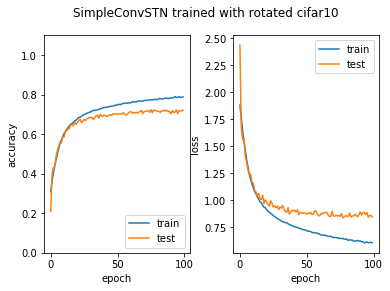

Testing both models on both datasets...


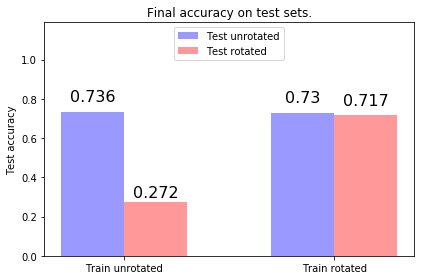

model_rotated_test_dataset score: loss=3.673054, accuracy=0.271900
model_rotated_train_dataset score: loss=3.634376, accuracy=0.277860
model_test_dataset score: loss=0.797452, accuracy=0.735500
model_train_dataset score: loss=0.360734, accuracy=0.888260
rotated_model_rotated_test_dataset score: loss=0.864604, accuracy=0.717300
rotated_model_rotated_train_dataset score: loss=0.611893, accuracy=0.786160
rotated_model_test_dataset score: loss=0.827270, accuracy=0.730000
rotated_model_train_dataset score: loss=0.567275, accuracy=0.801220


In [6]:
import pytorch_experiment
batch_size = 64

epochs={'cifar10':25,'mnist':20,'fashion_mnist':12,'cluttered_mnist':10,'lsa16':15,'mnist_rot':10,'pugeault':15}

rotated_epochs={'cifar10':100,'mnist':30,'fashion_mnist':60,'cluttered_mnist':30,'lsa16':100,'mnist_rot':15,'pugeault':40}

config=pytorch_experiment.TrainRotatedConfig(dataset_name=dataset,batch_size=batch_size,
                   epochs=epochs[dataset],rotated_epochs=rotated_epochs[dataset],
                   pre_rotated_epochs=0, optimizer=optimizer,rotated_optimizer=rotated_optimizer,
                  use_cuda=use_cuda)

scores=pytorch_experiment.train_rotated(config,model,rotated_model,
                                        x_train,y_train,x_test,y_test,plot_accuracy=True)


for k,v in scores.items():
    print('%s score: loss=%f, accuracy=%f' % (k,v[0],v[1]))


ROTATED MODEL
Correction for unrotated images


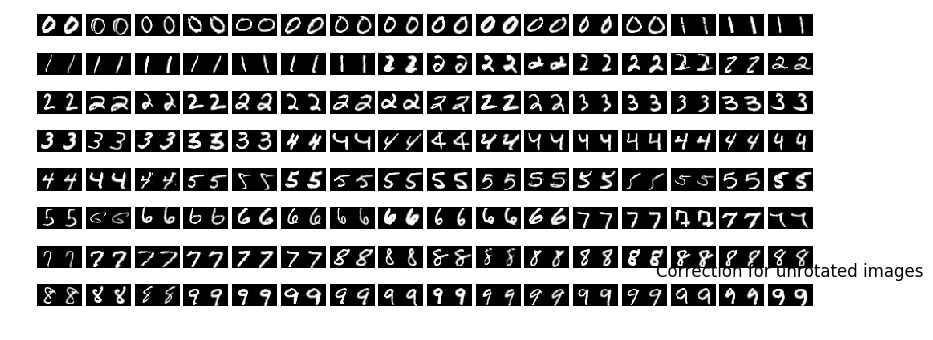

Correction for rotated images


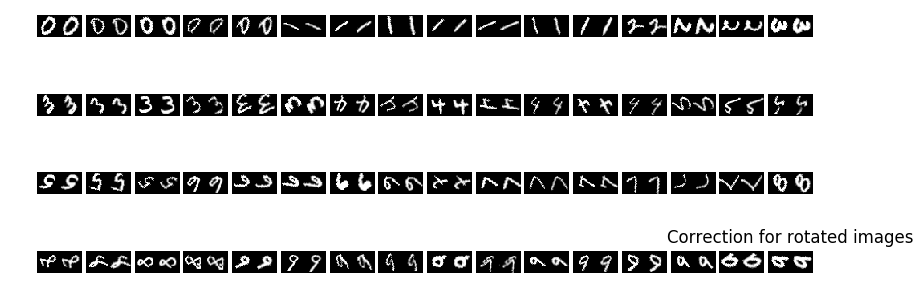

NORMAL MODEL
Correction for unrotated images


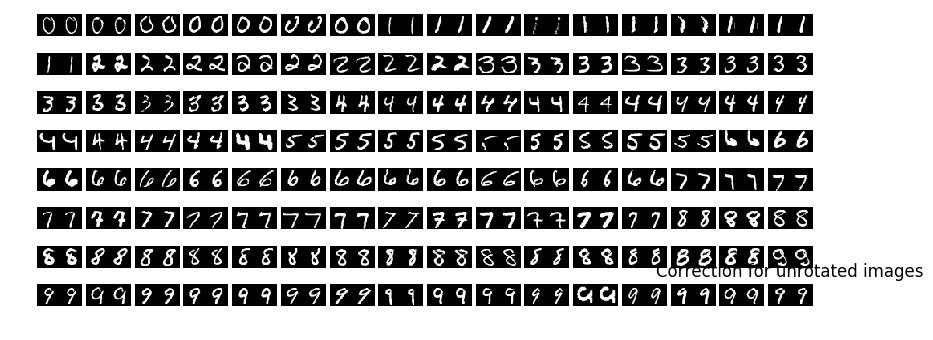

Correction for rotated images


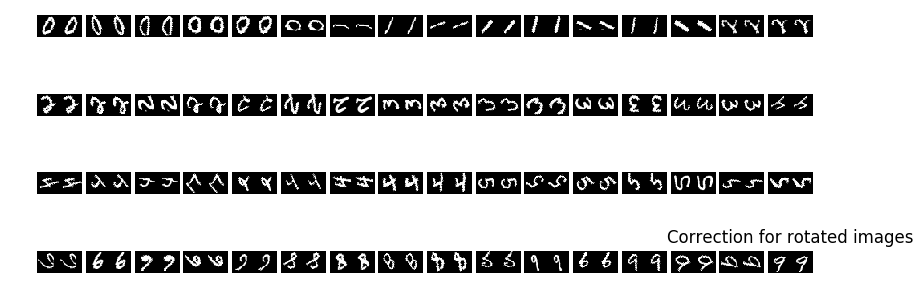

In [6]:
import resource
rlimit = resource.getrlimit(resource.RLIMIT_NOFILE)
resource.setrlimit(resource.RLIMIT_NOFILE, (2048, rlimit[1]))

import numpy as np
def plot_batch(before,after,title,angles,theta):

    n,c,h,w=before.shape
    columns=16
    rows=n // columns + (n % columns>0)

    combination=np.empty((n,c,h,w*2))
    combination[:,:,:,:h]=before
    combination[:, :, :, h:] = after
    combination=combination.transpose(0,2,3,1)

    f, plots = plt.subplots(rows,columns,figsize=(10,4),dpi=100)
    plt.title(title)
    for i in range(rows*columns):
        row, col = i // columns, i % columns
        if i<n:
            if c == 1:
                plots[row,col].imshow(combination[i, :, :, 0])
            else:
                plots[row,col].imshow(combination[i,:,:,:])
            if not (angles is None):
                angle=angles[i]
                cos,sin=theta[i,0],theta[i,1]
                title=f"α={angle:.2f}, {cos:.2}-{sin:.2}"
                title=f"α={angle:.2f}"
                plots[row, col].set_title(title,fontsize=8)
        plots[row, col].axis("off")
    plt.subplots_adjust(hspace=0.2,wspace=0.1)
    plt.show()
    
def plot_stl_rotation(batch_x,batch_y,model,use_cuda,title=""):
    indices=np.argsort(batch_y)
    batch_y=batch_y[indices]
    batch_x=batch_x[indices,:,:,:]
    batch_before = batch_x[:, :, :, :].clone().cpu().detach().numpy()
    batch_after=model.stl(batch_x).clone().cpu().detach().numpy()
    if isinstance(model.stl,pytorch_models.LearnableRotationTransformation):
        theta=model.stl.cos_sin(batch_x)
        theta=theta.clone().cpu().detach().numpy()
        angles= np.arctan(theta[:,1],theta[:,0])
    else:
        theta,angles=None,None
    
    plot_batch(batch_before,batch_after,title,angles,theta)


def plot(model,batches=[0],batch_size=64):
    from torch.utils.data import Dataset,DataLoader
    
    title="Correction for unrotated images"
    print(title)
    image_dataset=pytorch_experiment.ImageDataset(x_test, y_test)
    dataset = list(DataLoader(image_dataset , batch_size=batch_size, shuffle=True, num_workers=1))
    for batch in batches:
        batch_x,batch_y=dataset[batch]
        if use_cuda:
            batch_x=batch_x.cuda()
        
        plot_stl_rotation(batch_x,batch_y,model,use_cuda,title=title)
    
    title="Correction for rotated images"
    print(title)
    image_rotated_dataset = pytorch_experiment.ImageDataset(x_test, y_test, rotation=180)
    rotated_dataset = list(DataLoader(image_rotated_dataset , batch_size=config.batch_size, shuffle=True, num_workers=1))
    
    for batch in batches:
        batch_x,batch_y=rotated_dataset[batch]
        if use_cuda:
            batch_x=batch_x.cuda()
        
        plot_stl_rotation(batch_x,batch_y,model,use_cuda,title=title)
print("ROTATED MODEL")
plot(rotated_model,batches=[0],batch_size=128)
print("NORMAL MODEL")
plot(model,batches=[0],batch_size=128)

In [7]:
from torch.utils.data import Dataset,DataLoader
image_dataset=pytorch_experiment.ImageDataset(x_test, y_test)
dataset = list(DataLoader(image_dataset , batch_size=32, shuffle=True, num_workers=1))

In [8]:
from datetime import datetime

output_file="results/stn.txt"
general_message="%s\nResults on dataset %s with model %s and rotated model %s\n" % (str(datetime.now()),dataset,model.name,rotated_model.name)
pytorch_experiment.write_scores(scores,output_file,general_message,config=config)

2018-09-10 04:44:46.135010
Results on dataset [[tensor([[[[-0.4268, -0.4268, -0.4268,  ..., -0.4268, -0.4268, -0.4268],
          [-0.4268, -0.4268, -0.4268,  ..., -0.4268, -0.4268, -0.4268],
          [-0.4268, -0.4268, -0.4268,  ..., -0.4268, -0.4268, -0.4268],
          ...,
          [-0.4268, -0.4268, -0.4268,  ..., -0.4268, -0.4268, -0.4268],
          [-0.4268, -0.4268, -0.4268,  ..., -0.4268, -0.4268, -0.4268],
          [-0.4268, -0.4268, -0.4268,  ..., -0.4268, -0.4268, -0.4268]]],


        [[[-0.4268, -0.4268, -0.4268,  ..., -0.4268, -0.4268, -0.4268],
          [-0.4268, -0.4268, -0.4268,  ..., -0.4268, -0.4268, -0.4268],
          [-0.4268, -0.4268, -0.4268,  ..., -0.4268, -0.4268, -0.4268],
          ...,
          [-0.4268, -0.4268, -0.4268,  ..., -0.4268, -0.4268, -0.4268],
          [-0.4268, -0.4268, -0.4268,  ..., -0.4268, -0.4268, -0.4268],
          [-0.4268, -0.4268, -0.4268,  ..., -0.4268, -0.4268, -0.4268]]],


        [[[-0.4268, -0.4268, -0.4268,  ..., -0.426